# Chapter 16
## Downloading Data

### The CSV file format

Data is from <https://www.nostarch.com/pythoncrashcourse/>.

#### Parsing the CSV file headers

In [1]:
import csv

filename = 'chapter_16_resources/sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    print(header_row)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']


#### Printing the headers and their positions

In [2]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    for index, column_header in enumerate(header_row):
        print(index, column_header)

0 AKDT
1 Max TemperatureF
2 Mean TemperatureF
3 Min TemperatureF
4 Max Dew PointF
5 MeanDew PointF
6 Min DewpointF
7 Max Humidity
8  Mean Humidity
9  Min Humidity
10  Max Sea Level PressureIn
11  Mean Sea Level PressureIn
12  Min Sea Level PressureIn
13  Max VisibilityMiles
14  Mean VisibilityMiles
15  Min VisibilityMiles
16  Max Wind SpeedMPH
17  Mean Wind SpeedMPH
18  Max Gust SpeedMPH
19 PrecipitationIn
20  CloudCover
21  Events
22  WindDirDegrees


#### Extracting and reading data

In [3]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    highs = [int(row[1]) for row in reader]
    print(highs)

[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


#### Plotting data in a temperature chart

In [4]:
from matplotlib import pyplot as plt

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(highs, c='red')
plt.title('Daily high temperatures, July 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

#### The `datetime` module

In [5]:
from datetime import datetime
first_date = datetime.strptime('2014-7-1', '%Y-%m-%d')
print(first_date)

2014-07-01 00:00:00


#### Plotting dates

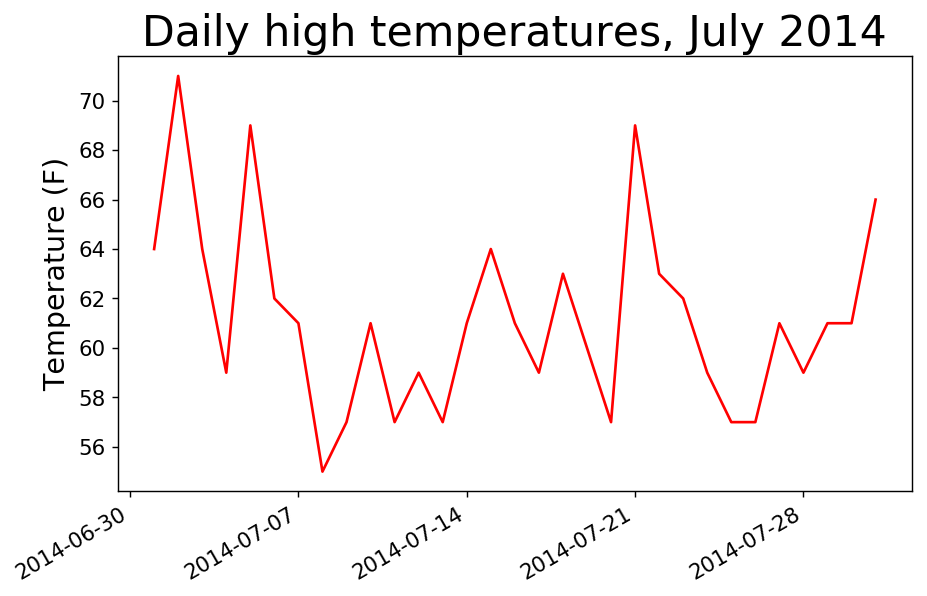

In [6]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs = [], []
    for row in reader:
        dates.append(datetime.strptime(row[0], '%Y-%m-%d'))
        highs.append(int(row[1]))

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red')
fig.autofmt_xdate()
plt.title('Daily high temperatures, July 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Plotting a longer timeframe

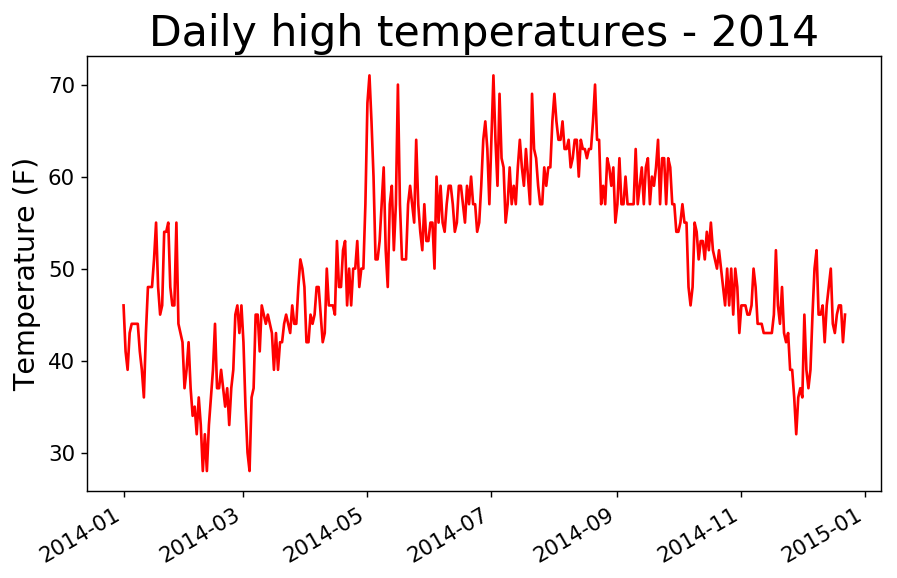

In [7]:
filename = 'chapter_16_resources/sitka_weather_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs = [], []
    for row in reader:
        dates.append(datetime.strptime(row[0], '%Y-%m-%d'))
        highs.append(int(row[1]))

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red')
fig.autofmt_xdate()
plt.title('Daily high temperatures - 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Plotting a second data series

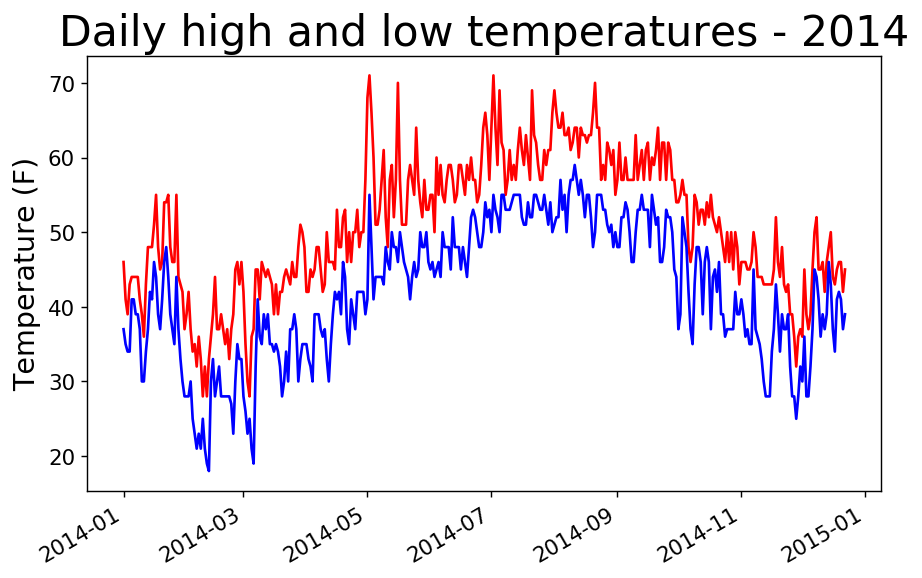

In [8]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        dates.append(datetime.strptime(row[0], '%Y-%m-%d'))
        highs.append(int(row[1]))
        lows.append(int(row[3]))

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red')
plt.plot(dates, lows, c='blue')
fig.autofmt_xdate()
plt.title('Daily high and low temperatures - 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Shading an area in the chart

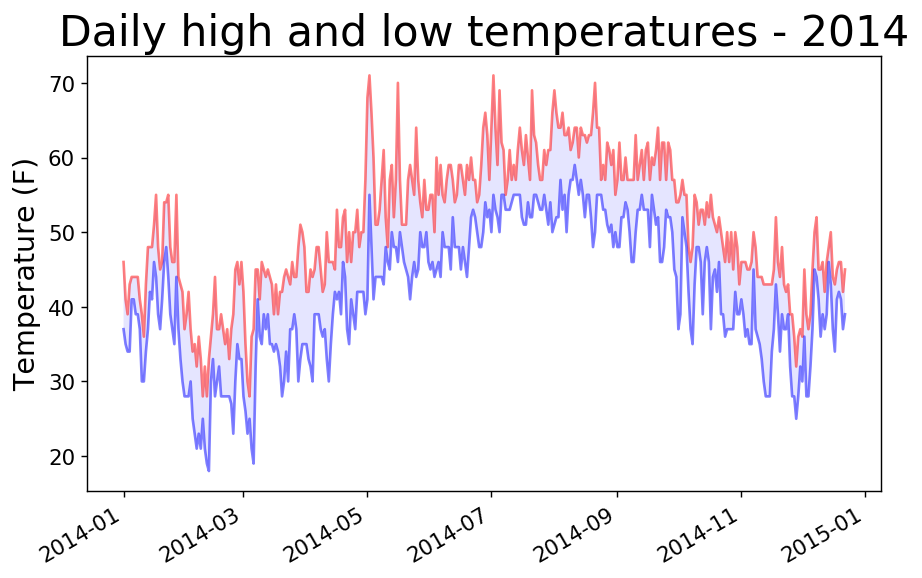

In [9]:
fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, lows, highs, facecolor='blue', alpha=0.1)
fig.autofmt_xdate()
plt.title('Daily high and low temperatures - 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Error-checking

2014-02-16 00:00:00 missing data


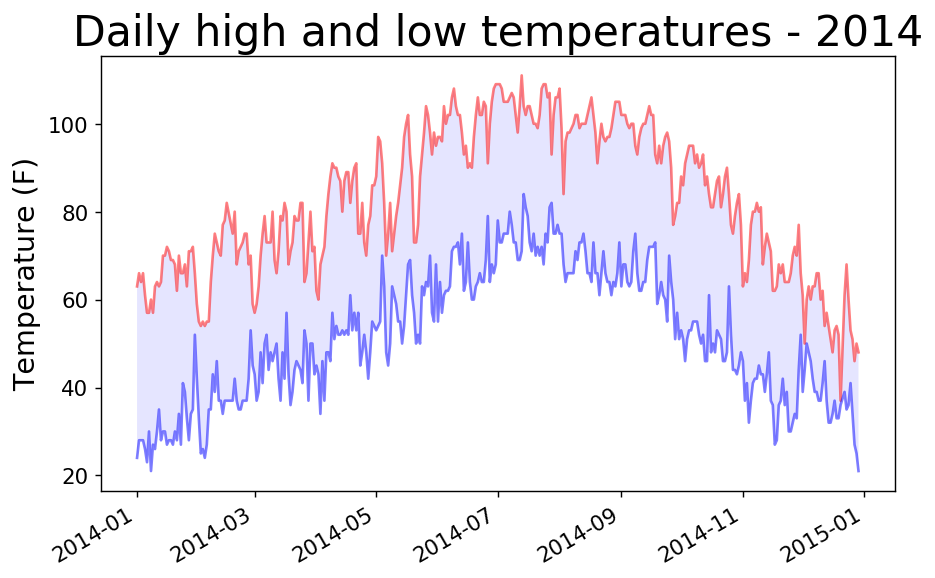

In [10]:
filename = 'chapter_16_resources/death_valley_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], '%Y-%m-%d')
            high = int(row[1])
            low = int(row[3])
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

fig = plt.figure(dpi=128, figsize=(8, 5))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, lows, highs, facecolor='blue', alpha=0.1)
fig.autofmt_xdate()
plt.title('Daily high and low temperatures - 2014', fontsize=24)
plt.xlabel('')
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

#### Try it yourself

2014-02-16 00:00:00 missing data


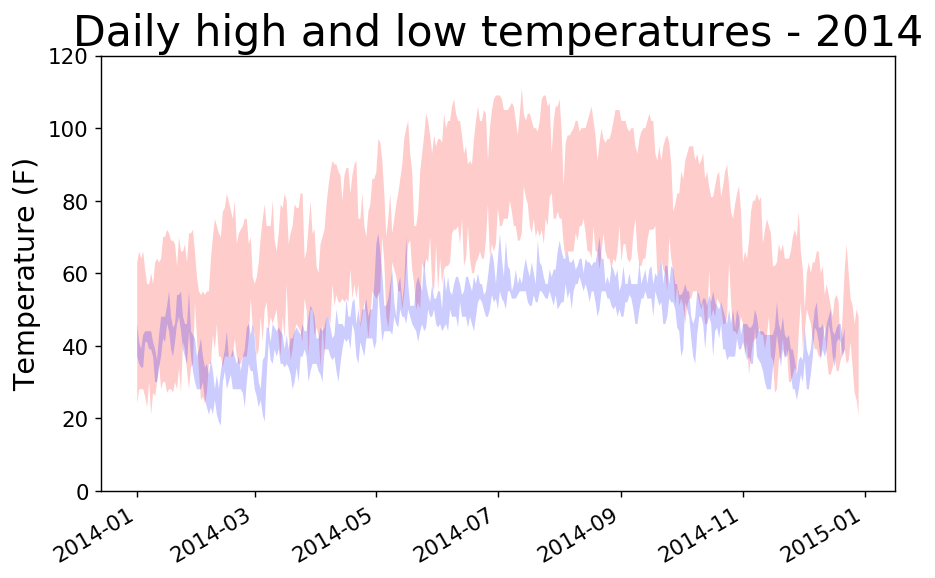

In [11]:
# 16-1. San Francisco: Are temperatures in San Francisco more like temperatures
# in Sitka or temperatures in Death Valley? Generate a high-low temperature
# plot for San Francisco and make a comparison. (You can download weather data
# for almost any location from www.wunderground.com/history/. Enter a location
# and date range, scroll to the bottom of the page, and find a link labeled
# 'Comma-Delimeted File'.)

# 16-2. Sitka-Death Valley comparison: The temperature scales on the Sitka and
# Death Valley graphs reflect the different ranges of the data. To accurately
# compare the temperature ranges, you need identical scales on the y-axis.
# Change the settings for the y-axis on one or both of the charts and make a
# direct comparison between temperature ranges in Sitka and Death Valley.
# Tyou can also try plotting the two data sets on the same chart.

def plot_weather_data_for_file(filename, fill_color=(0, 0, 1, 0.1), show_low_and_high=True):
    with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)
    
        dates, highs, lows = [], [], []
        for row in reader:
            try:
                current_date = datetime.strptime(row[0], '%Y-%m-%d')
                high = int(row[1])
                low = int(row[3])
            except ValueError:
                print(current_date, 'missing data')
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)
    
    if show_low_and_high:
        plt.plot(dates, highs, c='red', alpha=0.5)
        plt.plot(dates, lows, c='blue', alpha=0.5)
    plt.fill_between(dates, lows, highs, facecolor=fill_color)
    fig.autofmt_xdate()
    plt.title('Daily high and low temperatures - 2014', fontsize=24)
    plt.xlabel('')
    plt.ylabel('Temperature (F)', fontsize=16)
    plt.ylim((0, 120))
    plt.tick_params(axis='both', which='major', labelsize=12)

fig = plt.figure(dpi=128, figsize=(8, 5))
plot_weather_data_for_file('chapter_16_resources/death_valley_2014.csv', fill_color=(1, 0, 0, 0.2), show_low_and_high=False)
plot_weather_data_for_file('chapter_16_resources/sitka_weather_2014.csv', fill_color=(0, 0, 1, 0.2), show_low_and_high=False)
plt.show()

### Mapping Global Data Sets: JSON Format

In [12]:
import json

filename = 'chapter_16_resources/population_data.json'
with open(filename) as f:
    population_data = json.load(f)

for population_dict in population_data:
    if population_dict['Year'] == '2010':
        country_name = population_dict['Country Name']
        population = population_dict['Value']
        print(country_name + ': ' + population)


Arab World: 357868000
Caribbean small states: 6880000
East Asia & Pacific (all income levels): 2201536674
East Asia & Pacific (developing only): 1961558757
Euro area: 331766000
Europe & Central Asia (all income levels): 890424544
Europe & Central Asia (developing only): 405204000
European Union: 502125000
Heavily indebted poor countries (HIPC): 635663000
High income: 1127437398.85751
High income: nonOECD: 94204398.857512
High income: OECD: 1033233000
Latin America & Caribbean (all income levels): 589011025.857512
Latin America & Caribbean (developing only): 582551688
Least developed countries: UN classification: 835140827
Low & middle income: 5767157445
Low income: 796342000
Lower middle income: 2518690865
Middle East & North Africa (all income levels): 382803000
Middle East & North Africa (developing only): 331263000
Middle income: 4970815445
North America: 343539600
OECD members: 1236521688
Other small states: 18293000
Pacific island small states: 3345337
Small states: 28518337
South

#### Converting strings into numerical values

In [13]:
for population_dict in population_data:
    if population_dict['Year'] == '2010':
        country_name = population_dict['Country Name']
        population = int(float((population_dict['Value'])))
        print(country_name + ': ' + str(population))

Arab World: 357868000
Caribbean small states: 6880000
East Asia & Pacific (all income levels): 2201536674
East Asia & Pacific (developing only): 1961558757
Euro area: 331766000
Europe & Central Asia (all income levels): 890424544
Europe & Central Asia (developing only): 405204000
European Union: 502125000
Heavily indebted poor countries (HIPC): 635663000
High income: 1127437398
High income: nonOECD: 94204398
High income: OECD: 1033233000
Latin America & Caribbean (all income levels): 589011025
Latin America & Caribbean (developing only): 582551688
Least developed countries: UN classification: 835140827
Low & middle income: 5767157445
Low income: 796342000
Lower middle income: 2518690865
Middle East & North Africa (all income levels): 382803000
Middle East & North Africa (developing only): 331263000
Middle income: 4970815445
North America: 343539600
OECD members: 1236521688
Other small states: 18293000
Pacific island small states: 3345337
Small states: 28518337
South Asia: 1633146000
Su

#### Obtaining two-digit country codes

In [16]:
from pygal.maps.world import COUNTRIES

for country_code in sorted(COUNTRIES.keys()):
    print(country_code, COUNTRIES[country_code])

ad Andorra
ae United Arab Emirates
af Afghanistan
al Albania
am Armenia
ao Angola
aq Antarctica
ar Argentina
at Austria
au Australia
az Azerbaijan
ba Bosnia and Herzegovina
bd Bangladesh
be Belgium
bf Burkina Faso
bg Bulgaria
bh Bahrain
bi Burundi
bj Benin
bn Brunei Darussalam
bo Bolivia, Plurinational State of
br Brazil
bt Bhutan
bw Botswana
by Belarus
bz Belize
ca Canada
cd Congo, the Democratic Republic of the
cf Central African Republic
cg Congo
ch Switzerland
ci Cote d'Ivoire
cl Chile
cm Cameroon
cn China
co Colombia
cr Costa Rica
cu Cuba
cv Cape Verde
cy Cyprus
cz Czech Republic
de Germany
dj Djibouti
dk Denmark
do Dominican Republic
dz Algeria
ec Ecuador
ee Estonia
eg Egypt
eh Western Sahara
er Eritrea
es Spain
et Ethiopia
fi Finland
fr France
ga Gabon
gb United Kingdom
ge Georgia
gf French Guiana
gh Ghana
gl Greenland
gm Gambia
gn Guinea
gq Equatorial Guinea
gr Greece
gt Guatemala
gu Guam
gw Guinea-Bissau
gy Guyana
hk Hong Kong
hn Honduras
hr Croatia
ht Haiti
hu Hungary
id Indo

In [17]:
def get_country_code(country_name):
    """Return the Pygal 2-digit country code for the given country."""
    for code, name in COUNTRIES.items():
        if name == country_name:
            return code
    return None

print(get_country_code('Andorra'))
print(get_country_code('United Arab Emirates'))

ad
ae


In [18]:
for population_dict in population_data:
    if population_dict['Year'] == '2010':
        country_name = population_dict['Country Name']
        population = int(float((population_dict['Value'])))
        code = get_country_code(country_name)
        if code:
            print(code + ': ' + str(population))
        else:
            print('ERROR - ' + country_name)

ERROR - Arab World
ERROR - Caribbean small states
ERROR - East Asia & Pacific (all income levels)
ERROR - East Asia & Pacific (developing only)
ERROR - Euro area
ERROR - Europe & Central Asia (all income levels)
ERROR - Europe & Central Asia (developing only)
ERROR - European Union
ERROR - Heavily indebted poor countries (HIPC)
ERROR - High income
ERROR - High income: nonOECD
ERROR - High income: OECD
ERROR - Latin America & Caribbean (all income levels)
ERROR - Latin America & Caribbean (developing only)
ERROR - Least developed countries: UN classification
ERROR - Low & middle income
ERROR - Low income
ERROR - Lower middle income
ERROR - Middle East & North Africa (all income levels)
ERROR - Middle East & North Africa (developing only)
ERROR - Middle income
ERROR - North America
ERROR - OECD members
ERROR - Other small states
ERROR - Pacific island small states
ERROR - Small states
ERROR - South Asia
ERROR - Sub-Saharan Africa (all income levels)
ERROR - Sub-Saharan Africa (developing

#### Building a world map

In [24]:
wm = pygal.maps.world.World()
wm.title = 'North, Central, and South America'

wm.add('North America', ['ca', 'mx', 'us'])
wm.add('Central America', ['bz', 'cr', 'gt', 'hn', 'ni', 'pa', 'sv'])
wm.add('South America', ['ar', 'bo', 'br', 'cl', 'co', 'ec', 'gf', 'gy', 'pe', 'py', 'sr', 'uy', 've'])

wm.render_to_file('chapter_16_output/americas.svg')

#### Plotting numerical data on a world map

In [28]:
import pygal

wm = pygal.maps.world.World()
wm.title = 'Populations of Countries in North America'
wm.add('North America', {'ca': 34126000, 'us': 309349000, 'mx': 113423000})

wm.render_to_file('chapter_16_output/na_populations.svg')

#### Plotting a complete population map

In [35]:
cc_populations = {}
for population_dict in population_data:
    if population_dict['Year'] == '2010':
        country_name = population_dict['Country Name']
        population = int(float((population_dict['Value'])))
        code = get_country_code(country_name)
        if code:
            cc_populations[code] = population

wm = pygal.maps.world.World()
wm.title = 'World Populations in 2010, by Country'
wm.add('2010', cc_populations)

wm.render_to_file('chapter_16_output/world_population.svg')

#### Grouping Countries by Population

In [36]:
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10_000_000:
        cc_pops_1[cc] = pop
    elif pop < 1_000_000_000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop

print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

85 69 2


In [37]:
wm = pygal.maps.world.World()
wm.title = 'World Populations in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

wm.render_to_file('chapter_16_output/world_population_chunked.svg')

#### Styling world maps in Pygal

In [38]:
from pygal.style import RotateStyle

wm = pygal.maps.world.World(style=RotateStyle('#336699'))
wm.title = 'World Populations in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

wm.render_to_file('chapter_16_output/world_population_chunked.svg')